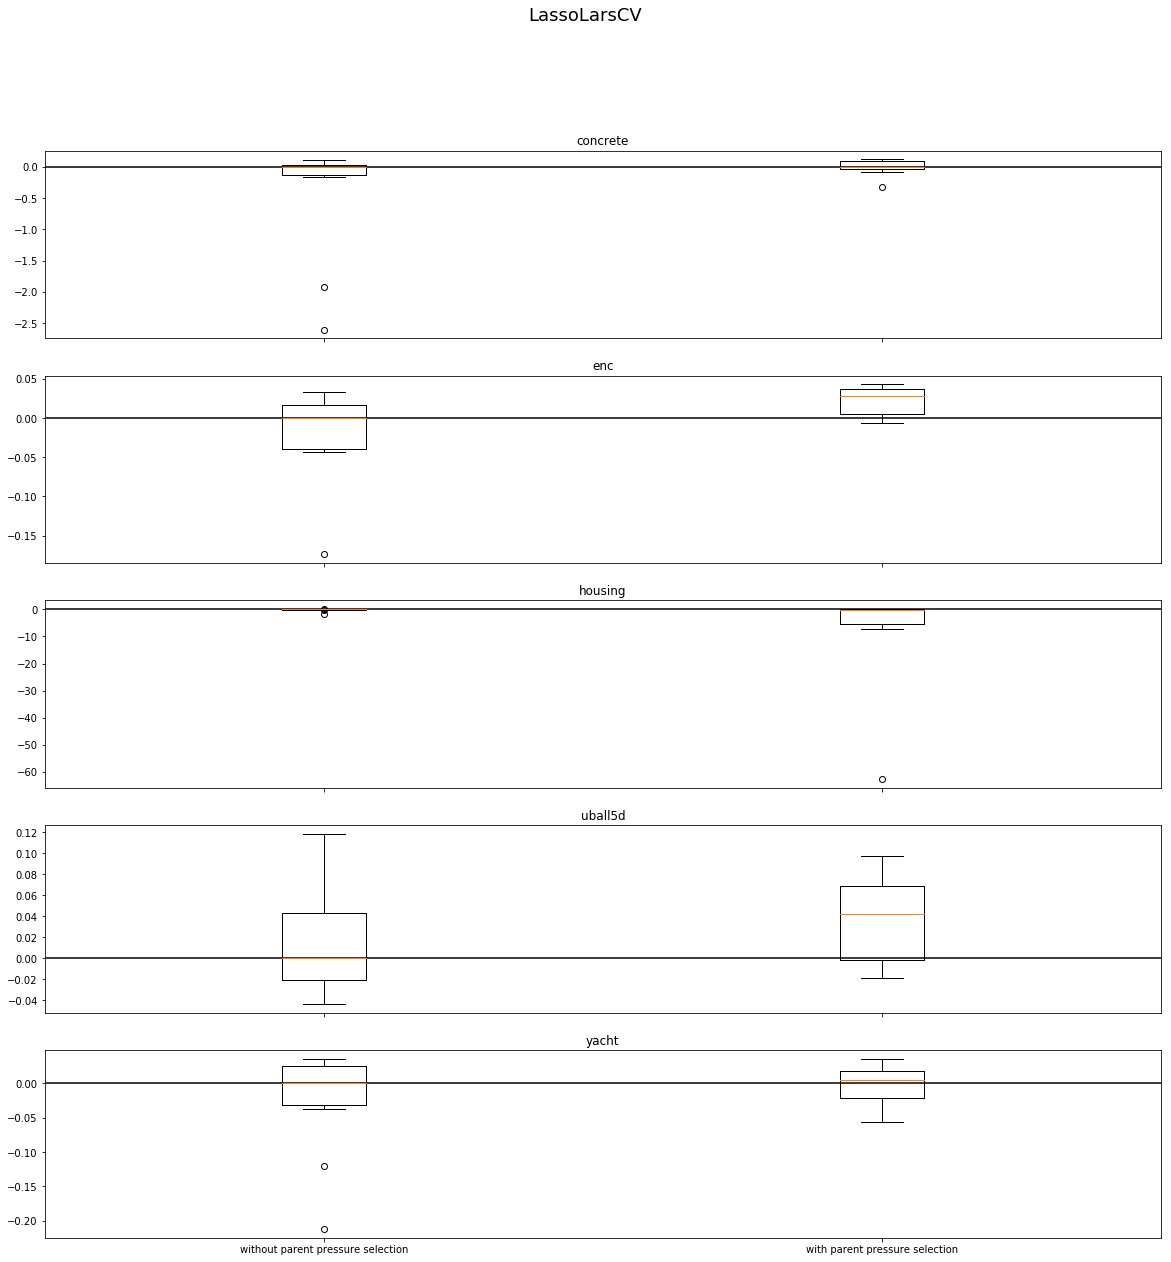

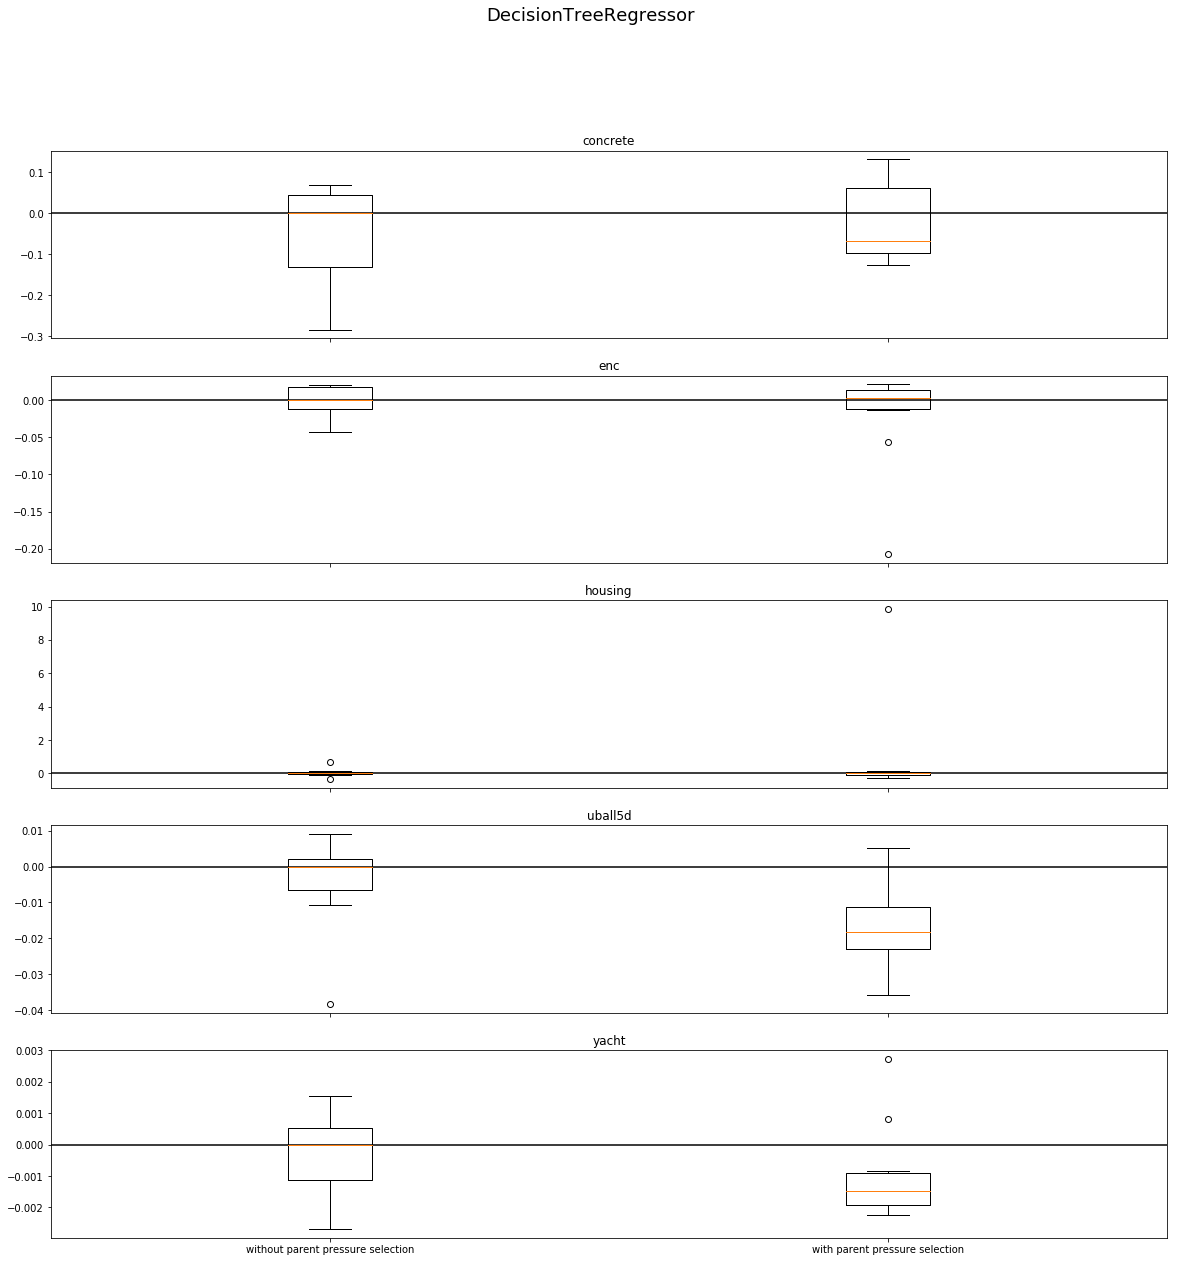

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0)

estimators_reg = ["LassoLarsCV","DecisionTreeRegressor"]
estimators_clf = ["LogisticRegression", "DecisionTreeClassifier"]
df = pd.read_csv("FEW-config-compare-weight_parents.csv", sep="\t");
problems_reg = ['concrete','enc','housing','uball5d','yacht']
problems_clf = ['heart','bc_clean','yeast','seg','wav']

for est in estimators_reg:
#     print(est)
    h,ax = plt.subplots(5,sharex=True)
    h.suptitle(est,size=18)
    df_est = df.loc[df['ml'] == est]
    for i,p in enumerate(problems_reg):
        df_prb = df_est.loc[df_est['dataset'] == p]
        df_wp = df_prb.loc[df_prb['method'] == "weight_parents"]
        df_control = df_prb.loc[df_prb['method'] == "control"]
        scores = np.ndarray((2,10))
        j=0
        for score in np.asarray(df_control['score']):
            scores[0][j]= score
            j=j+1
        j=0
        for score in np.asarray(df_wp['score']):
            scores[1][j]= score
            j=j+1
        #scores[1]= np.asarray(df_wp['score'])
        norm_scores = scores - np.median(scores[0,:])
        ax[i].boxplot(list(norm_scores))
        ax[i].plot([0,3],[0,0],'-k')
        ax[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
        ax[i].set_title(p)
plt.show()

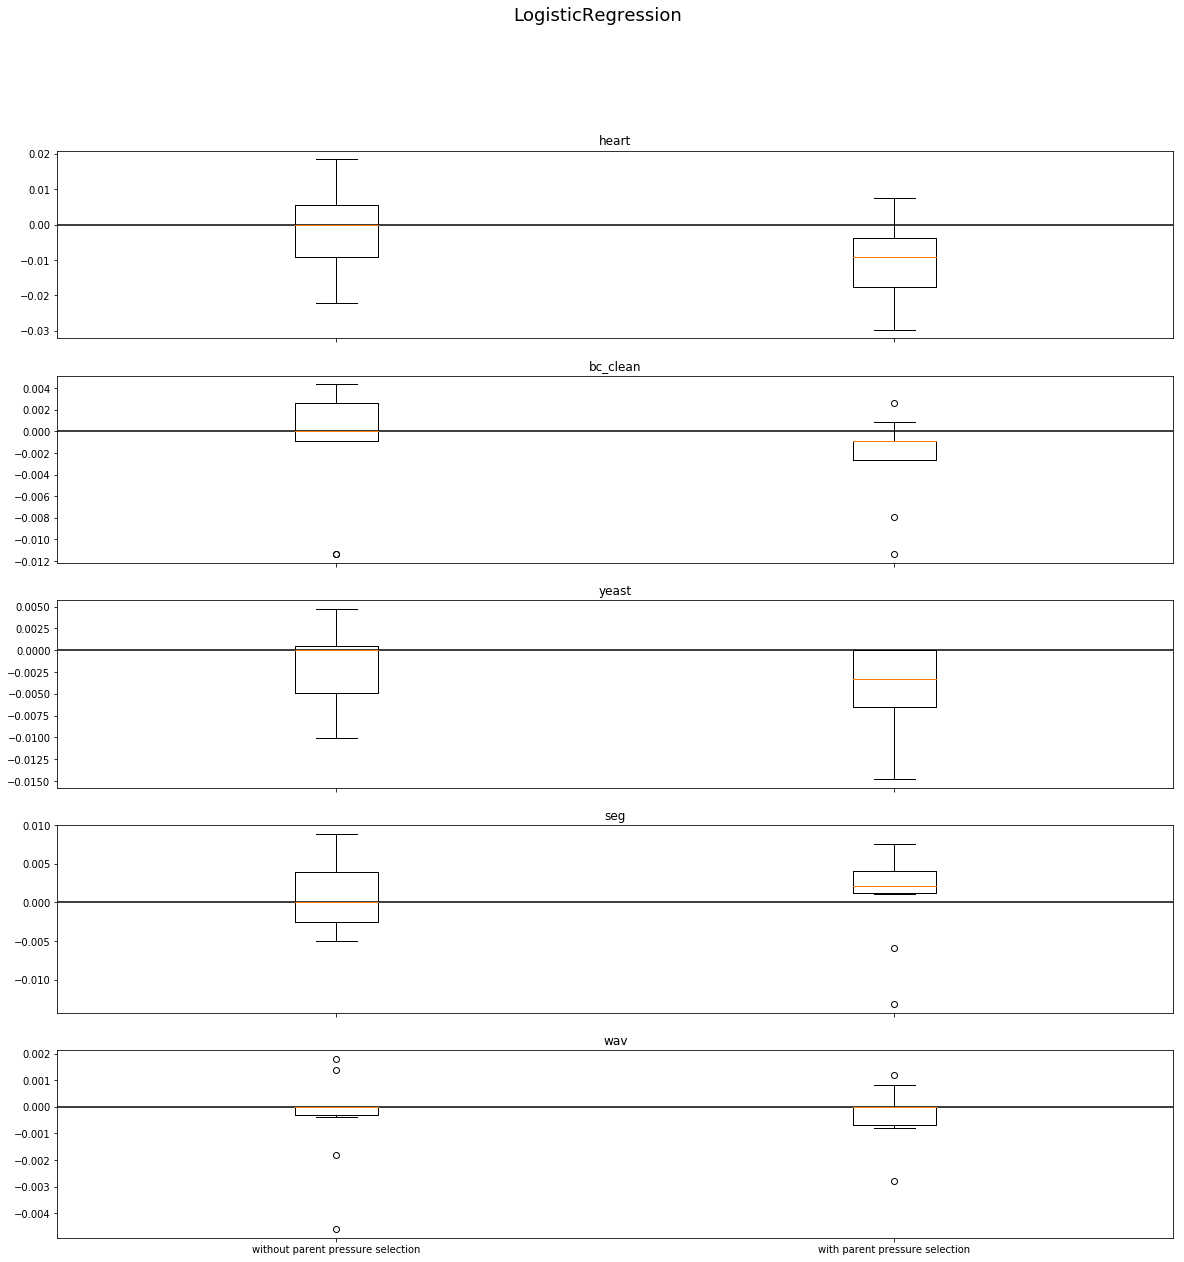

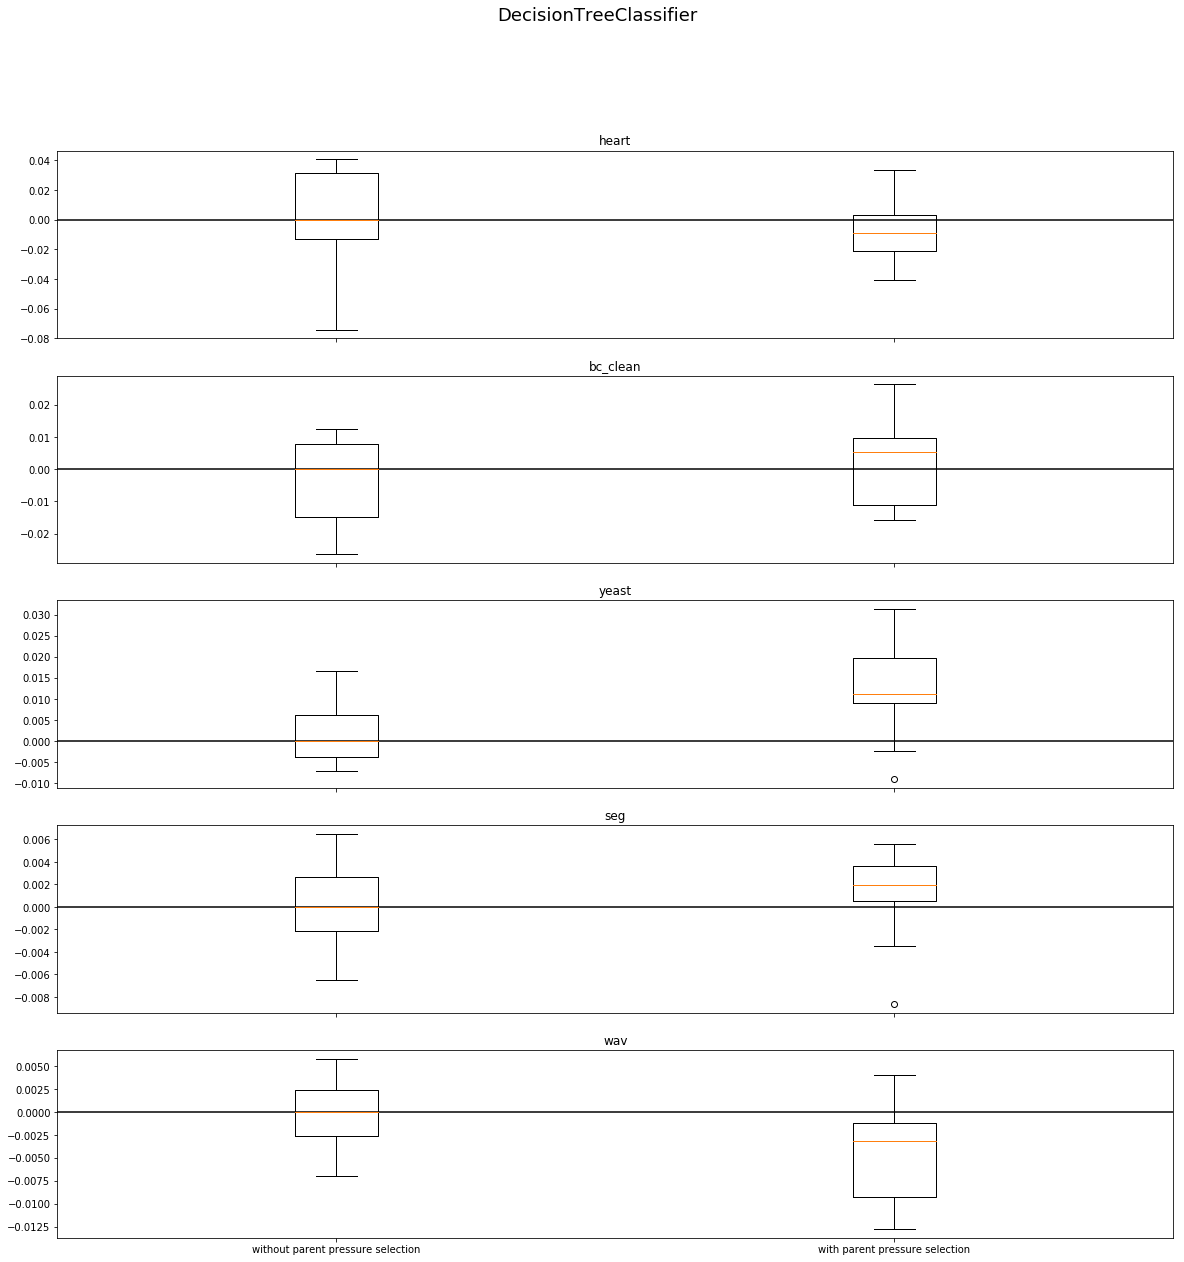

In [4]:
for est in estimators_clf:
#     print(est)
    h,ax = plt.subplots(5,sharex=True)
    h.suptitle(est,size=18)
    df_est = df.loc[df['ml'] == est]
    for i,p in enumerate(problems_clf):
        df_prb = df_est.loc[df_est['dataset'] == p]
        df_wp = df_prb.loc[df_prb['method'] == "weight_parents"]
        df_control = df_prb.loc[df_prb['method'] == "control"]
        scores = np.ndarray((2,10))
        j=0
        for score in np.asarray(df_control['score']):
            scores[0][j]= score
            j=j+1
        j=0
        for score in np.asarray(df_wp['score']):
            scores[1][j]= score
            j=j+1
        norm_scores = scores - np.median(scores[0,:])
        ax[i].boxplot(list(norm_scores))
        ax[i].plot([0,3],[0,0],'-k')
        ax[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
        ax[i].set_title(p)
plt.show()